# Predicting the unpredictable spread of Corona Virus in South Africa

## Introduction

### What is COVID-19?

SARS-CoV-2 is a new strain of coronavirus that has not been previously identified in humans. COVID-19 was identified as the cause of an outbreak of respiratory illness first detected in Wuhan, China.

On 5 March 2020, Minister of Health Zweli Mkhize confirmed the spread of the virus to South Africa, with the first known patient being a male citizen who tested positive upon his return from Italy. The first two deaths to have occurred from the disease were reported on 27 March 2020. As of August 2020, South Africa has the highest number of COVID-19 cases in Africa and the sixth highest number of confirmed infections worldwide.

On 15 March, the President of South Africa, Cyril Ramaphosa, declared a national state of disaster and announced measures such as immediate travel restrictions and the closure of schools from 18 March. On 17 March, the National Coronavirus Command Council was established, "to lead the nation's plan to contain the spread and mitigate the negative impact of the coronavirus". On 23 March, a national lockdown was announced, starting on 26 March 2020. On 21 April, a 500 billion rand stimulus was announced in response to the pandemic.

### Predicting the Spread

The objective of this notebook is to evaluate and develop a model that can predict the spread of the novel corona virus in South Africa. The hope of many South African's, business and governement is to see the economy opening up after the devastating effects of the lockdown measures which have left many realing from loss of income, companies closed, and restricted movement in the informal market. Using past data we will be predicting the number of cases of Corona up the end of year and seek to estimate when the economy will be opened. The Time Series data of confirmed cases will be modeled using comparisons between Facebook's Prophet and LSTM model.

In [2]:
from __future__ import print_function
# Import needed packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet 
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
import warnings
warnings.filterwarnings('ignore')

In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

### Loading the data

In [3]:
df = pd.read_csv(r'C:\Users\cheml\Documents\Skul\Datasets\covid19za-master\data\covid19za_provincial_cumulative_timeline_confirmed.csv')
df['date'] = pd.to_datetime(df['date'])
df_confirmed = df[["date", "total"]]

# Prophet uses 'ds' and 'y'

df_confirmed = df_confirmed.rename(columns={"date":"ds", "total":"y",})
df_confirmed.tail(5)


,ds,y
165,2020-08-19,596060
166,2020-08-20,599940
167,2020-08-21,603338
168,2020-08-22,607045
169,2020-08-23,609773


## Forecasting 

Steps involved in forecasting:

1. Building the model
2. Fitting the model
3. Creating dataframe for the upcoming days
4. Forecasting
5. Plotting

## Forecasting Confirmed Cases in South Africa

In [4]:
df_confirmed.tail(5) 

,ds,y
165,2020-08-19,596060
166,2020-08-20,599940
167,2020-08-21,603338
168,2020-08-22,607045
169,2020-08-23,609773


### 1. Building the Model

In [5]:
model = Prophet(interval_width=0.95, yearly_seasonality=True, daily_seasonality=True, changepoint_prior_scale=0.15)

# interval_width means the confidence level. 0.95 implies that the model will try to forecast with an accuracy of 95%

### 2. Fitting the Model

In [6]:
model.fit(df_confirmed)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


### 3. Creating Dataframe for the Coming Days

In [7]:
# Forecasting upto 31 December 2020

forecast = model.make_future_dataframe(periods=7)

In [8]:
forecast.tail(5)

,ds
172,2020-12-11
173,2020-12-12
174,2020-12-13
175,2020-12-14
176,2020-12-15


### 4. Forecasting 

In [9]:
forecast = model.predict(forecast)

In [10]:
forecast.tail(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
172,2020-12-11,476779.856795,40220.299011,555451.487850,476779.856720,476779.856856,-178114.495218,-178114.495218,-178114.495218,-76102.467319,...,-8209.278124,-8209.278124,-8209.278124,-93802.749776,-93802.749776,-93802.749776,0.0,0.0,0.0,298665.361576
173,2020-12-12,478225.523830,77022.387573,590376.460098,478225.523707,478225.523934,-139577.583272,-139577.583272,-139577.583272,-76102.467319,...,-1036.145152,-1036.145152,-1036.145152,-62438.970801,-62438.970801,-62438.970801,0.0,0.0,0.0,338647.940558
174,2020-12-13,479671.190865,113553.860337,631878.409119,479671.190693,479671.191005,-103873.172736,-103873.172736,-103873.172736,-76102.467319,...,3285.504537,3285.504537,3285.504537,-31056.209954,-31056.209954,-31056.209954,0.0,0.0,0.0,375798.018129
175,2020-12-14,481116.857900,144691.342523,681539.177762,481116.857671,481116.858085,-83069.393775,-83069.393775,-83069.393775,-76102.467319,...,-6823.599518,-6823.599518,-6823.599518,-143.326938,-143.326938,-143.326938,0.0,0.0,0.0,398047.464125
176,2020-12-15,482562.524935,173638.566836,710382.216137,482562.524659,482562.525171,-32945.617431,-32945.617431,-32945.617431,-76102.467319,...,13313.813254,13313.813254,13313.813254,29843.036635,29843.036635,29843.036635,0.0,0.0,0.0,449616.907504


We need to focus on the columns 'ds', 'yhat', 'yhat_lower', and 'yhat_upper'

- yhat is the predicted value
- yhat_lower is the lower limit of yhat
- yhat_upper is the upper limit of yhat

In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-04,130749.471479,-132164.719808,402315.648495
1,2020-01-05,135393.774473,-121125.954064,406313.801805
2,2020-01-06,126006.428337,-144076.624411,384366.334647
3,2020-01-07,147371.891618,-106691.523059,425879.101610
4,2020-01-08,154971.574306,-99226.359593,420949.783040
...,...,...,...,...
172,2020-12-11,298665.361576,40220.299011,555451.487850
173,2020-12-12,338647.940558,77022.387573,590376.460098
174,2020-12-13,375798.018129,113553.860337,631878.409119
175,2020-12-14,398047.464125,144691.342523,681539.177762


### 5. Plotting Confirmed Cases

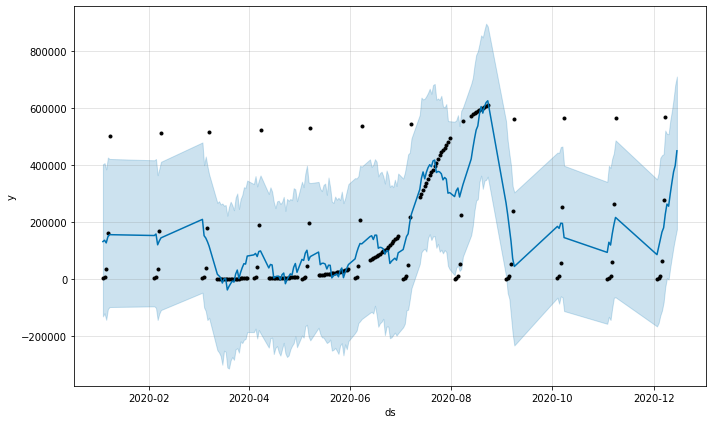

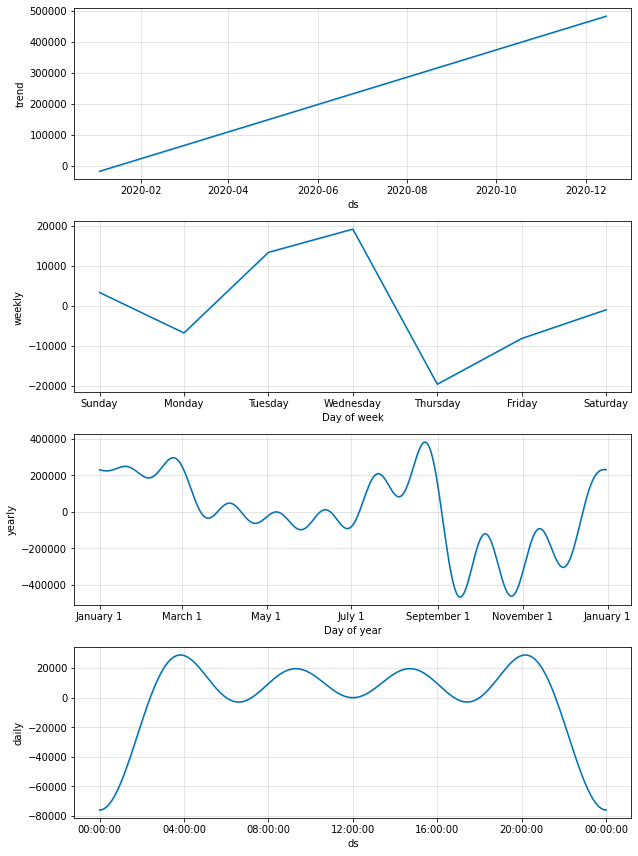

In [15]:
plot1 = model.plot(forecast)
plot2 = model.plot_components(forecast)
plt.savefig('fb_imga.png')


- Black dots are the actual present values
- Blue line are the forecasted values

In [17]:
# Finding Points/Dates of Change

from fbprophet.plot import add_changepoints_to_plot

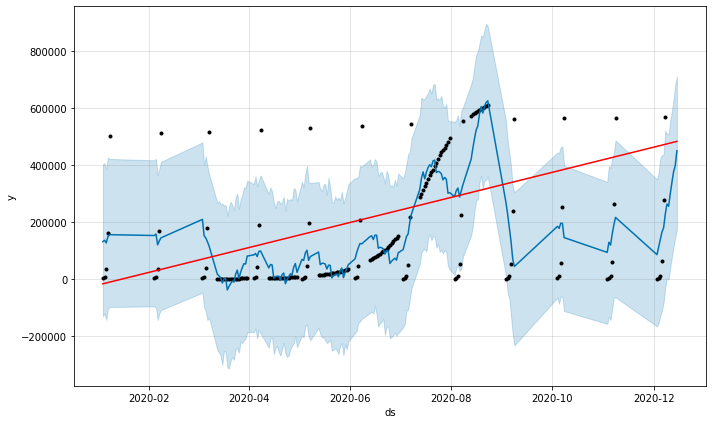

In [18]:
plot3 = model.plot(forecast)
c = add_changepoints_to_plot(plot3.gca(),model,forecast)
plt.savefig('fb_imag2.png')

## LSTM Model

In [15]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Using TensorFlow backend.


In [16]:
data = pd.read_csv(r'C:\Users\cheml\Documents\Skul\Datasets\covid19za-master\data\covid19za_provincial_cumulative_timeline_confirmed.csv')
data['date'] = pd.to_datetime(data['date'])
df = data[['date','total']]
df.head(3)

,date,total
0,2020-05-03,1
1,2020-07-03,2
2,2020-08-03,3


In [21]:
data = df.filter(['total'])

In [22]:
dataset = data.values

In [23]:
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

136

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [25]:
scaled_data

array([[0.00000000e+00],
       [1.63995723e-06],
       [3.27991446e-06],
       [9.83974338e-06],
       [1.96794868e-05],
       [2.45993584e-05],
       [3.77190163e-05],
       [6.06784175e-05],
       [8.19978615e-05],
       [1.00037391e-04],
       [1.37756407e-04],
       [1.88595081e-04],
       [2.44353627e-04],
       [3.29631403e-04],
       [3.91949778e-04],
       [4.47708324e-04],
       [6.57622849e-04],
       [9.06896348e-04],
       [1.16108972e-03],
       [1.51860039e-03],
       [1.91711000e-03],
       [1.94498927e-03],
       [2.09750530e-03],
       [2.17294333e-03],
       [2.21722217e-03],
       [2.26150102e-03],
       [2.39597751e-03],
       [2.46649567e-03],
       [2.59769225e-03],
       [2.71248926e-03],
       [2.76332793e-03],
       [2.86664524e-03],
       [3.02408113e-03],
       [3.17003733e-03],
       [3.28319437e-03],
       [3.32419331e-03],
       [3.56198710e-03],
       [3.72434287e-03],
       [3.95885675e-03],
       [4.10809286e-03],


In [26]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []

for i in range(10, len(train_data)):
  x_train.append(train_data[i-10:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 10:
    print(x_train)
    print(y_train)
    print()

[array([0.00000000e+00, 1.63995723e-06, 3.27991446e-06, 9.83974338e-06,
       1.96794868e-05, 2.45993584e-05, 3.77190163e-05, 6.06784175e-05,
       8.19978615e-05, 1.00037391e-04])]
[0.00013775640731289725]



In [27]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(126, 10, 1)

In [29]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [30]:
#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [31]:
model.fit(x_train,y_train,batch_size=1, epochs=50)

Epoch 1/50
126/126 [==============================] - 14s 109ms/step - loss: 0.0035
Epoch 2/50
126/126 [==============================] - 5s 42ms/step - loss: 4.5629e-04
Epoch 3/50
126/126 [==============================] - 7s 58ms/step - loss: 1.0818e-04
Epoch 4/50
126/126 [==============================] - 4s 34ms/step - loss: 2.6308e-04
Epoch 5/50
126/126 [==============================] - 5s 41ms/step - loss: 2.0922e-05
Epoch 6/50
126/126 [==============================] - 4s 35ms/step - loss: 1.5656e-04:   - ETA: 1s - loss: 2.7663e-0 - ETA: 1s 
Epoch 7/50
126/126 [==============================] - 4s 30ms/step - loss: 4.8489e-05
Epoch 8/50
126/126 [==============================] - 4s 31ms/step - loss: 1.2548e-04
Epoch 9/50
126/126 [==============================] - ETA: 0s - loss: 2.1484e-0 - 5s 43ms/step - loss: 2.1163e-04
Epoch 10/50
126/126 [==============================] - 5s 39ms/step - loss: 3.7881e-05
Epoch 11/50
126/126 [==============================] - 4s 33ms/step - l

In [32]:
test_data = scaled_data[training_data_len-10: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [33]:
len(test_data)

44

In [34]:
x_test = np.array(x_test)

In [35]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [36]:
x_test

array([[[0.43324882],
        [0.45302343],
        [0.47197149],
        [0.48918448],
        [0.51010542],
        [0.53170693],
        [0.55363808],
        [0.57542491],
        [0.5974807 ],
        [0.6127323 ]],

       [[0.45302343],
        [0.47197149],
        [0.48918448],
        [0.51010542],
        [0.53170693],
        [0.55363808],
        [0.57542491],
        [0.5974807 ],
        [0.6127323 ],
        [0.62613075]],

       [[0.47197149],
        [0.48918448],
        [0.51010542],
        [0.53170693],
        [0.55363808],
        [0.57542491],
        [0.5974807 ],
        [0.6127323 ],
        [0.62613075],
        [0.64769619]],

       [[0.48918448],
        [0.51010542],
        [0.53170693],
        [0.55363808],
        [0.57542491],
        [0.5974807 ],
        [0.6127323 ],
        [0.62613075],
        [0.64769619],
        [0.66918619]],

       [[0.51010542],
        [0.53170693],
        [0.55363808],
        [0.57542491],
        [0.5974807 ],
  

In [37]:
len(x_test)

34

In [38]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [39]:
predictions

array([[391912.94],
       [403806.53],
       [415541.7 ],
       [427338.97],
       [439382.22],
       [451361.62],
       [463054.25],
       [473859.06],
       [483727.53],
       [493286.  ],
       [502809.03],
       [512360.25],
       [521693.22],
       [530561.75],
       [538578.4 ],
       [545672.75],
       [552441.44],
       [559146.06],
       [565714.4 ],
       [572096.  ],
       [578212.56],
       [583732.25],
       [588514.8 ],
       [592678.56],
       [596509.5 ],
       [600393.75],
       [604142.06],
       [607671.3 ],
       [610873.3 ],
       [613709.5 ],
       [616420.75],
       [619139.  ],
       [621854.44],
       [624582.3 ]], dtype=float32)

In [40]:
len(predictions)

34

In [41]:
rmse = np.sqrt( np.mean( predictions - y_test )**2)
rmse

13477.44669117647

In [42]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicted Cases'] = predictions

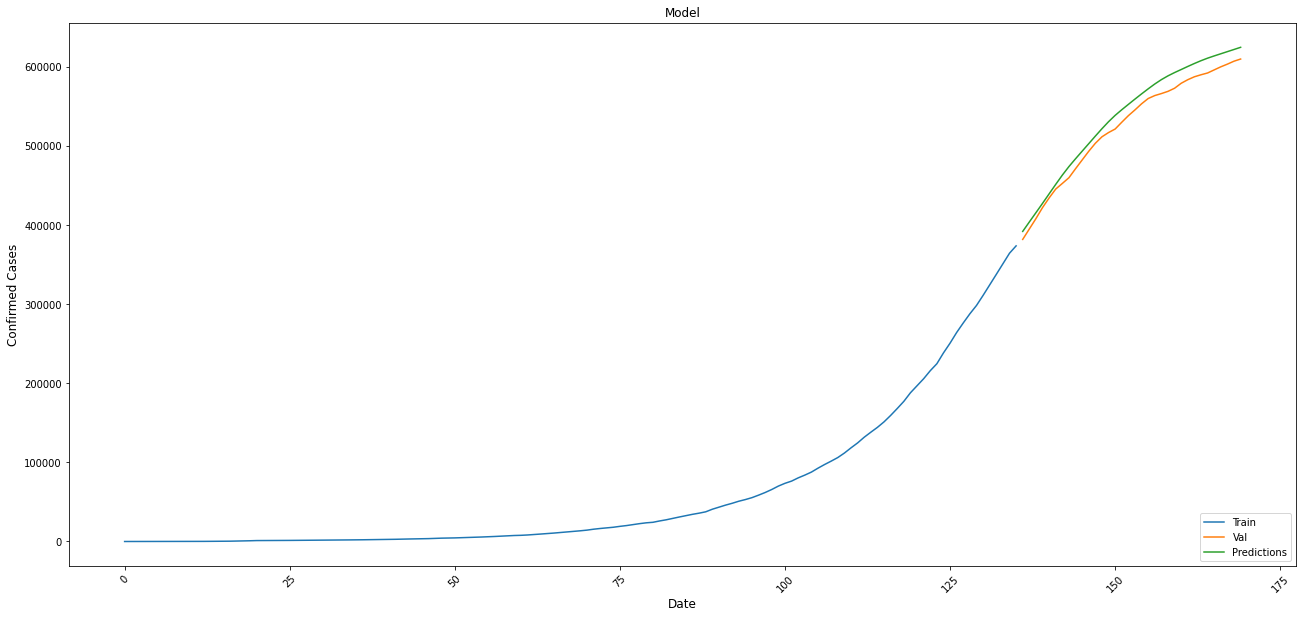

In [43]:
plt.figure(figsize=(22,10))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.plot(train['total'])
plt.plot(valid[['total', 'Predicted Cases']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# plt.savefig('output.png', dpi=300)
plt.show()

In [44]:
valid

,total,Predicted Cases
136,381798,391912.93750
137,394948,403806.53125
138,408052,415541.68750
139,421996,427338.96875
140,434200,439382.21875
141,445433,451361.62500
142,452529,463054.25000
143,459761,473859.06250
144,471123,483727.53125
145,482169,493286.00000


In [45]:
len(valid)

34

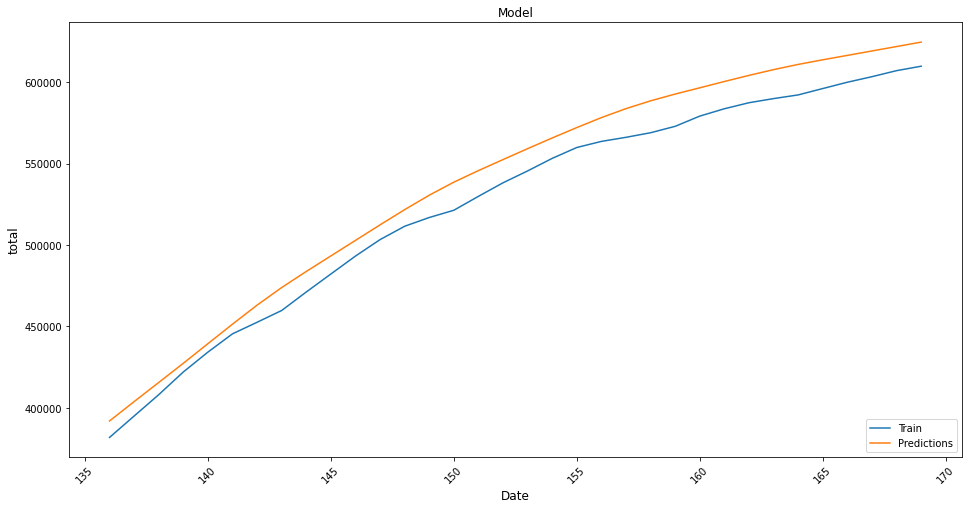

In [46]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('total', fontsize=12)
plt.plot(valid)
plt.legend(['Train', 'Predictions'], loc='lower right')
# plt.savefig('output1.png', dpi=300)
#plt.show()

In [47]:
from sklearn.metrics import r2_score
score = r2_score(valid['total'], valid['Predicted Cases'])
print(score)

0.9556971848220166
